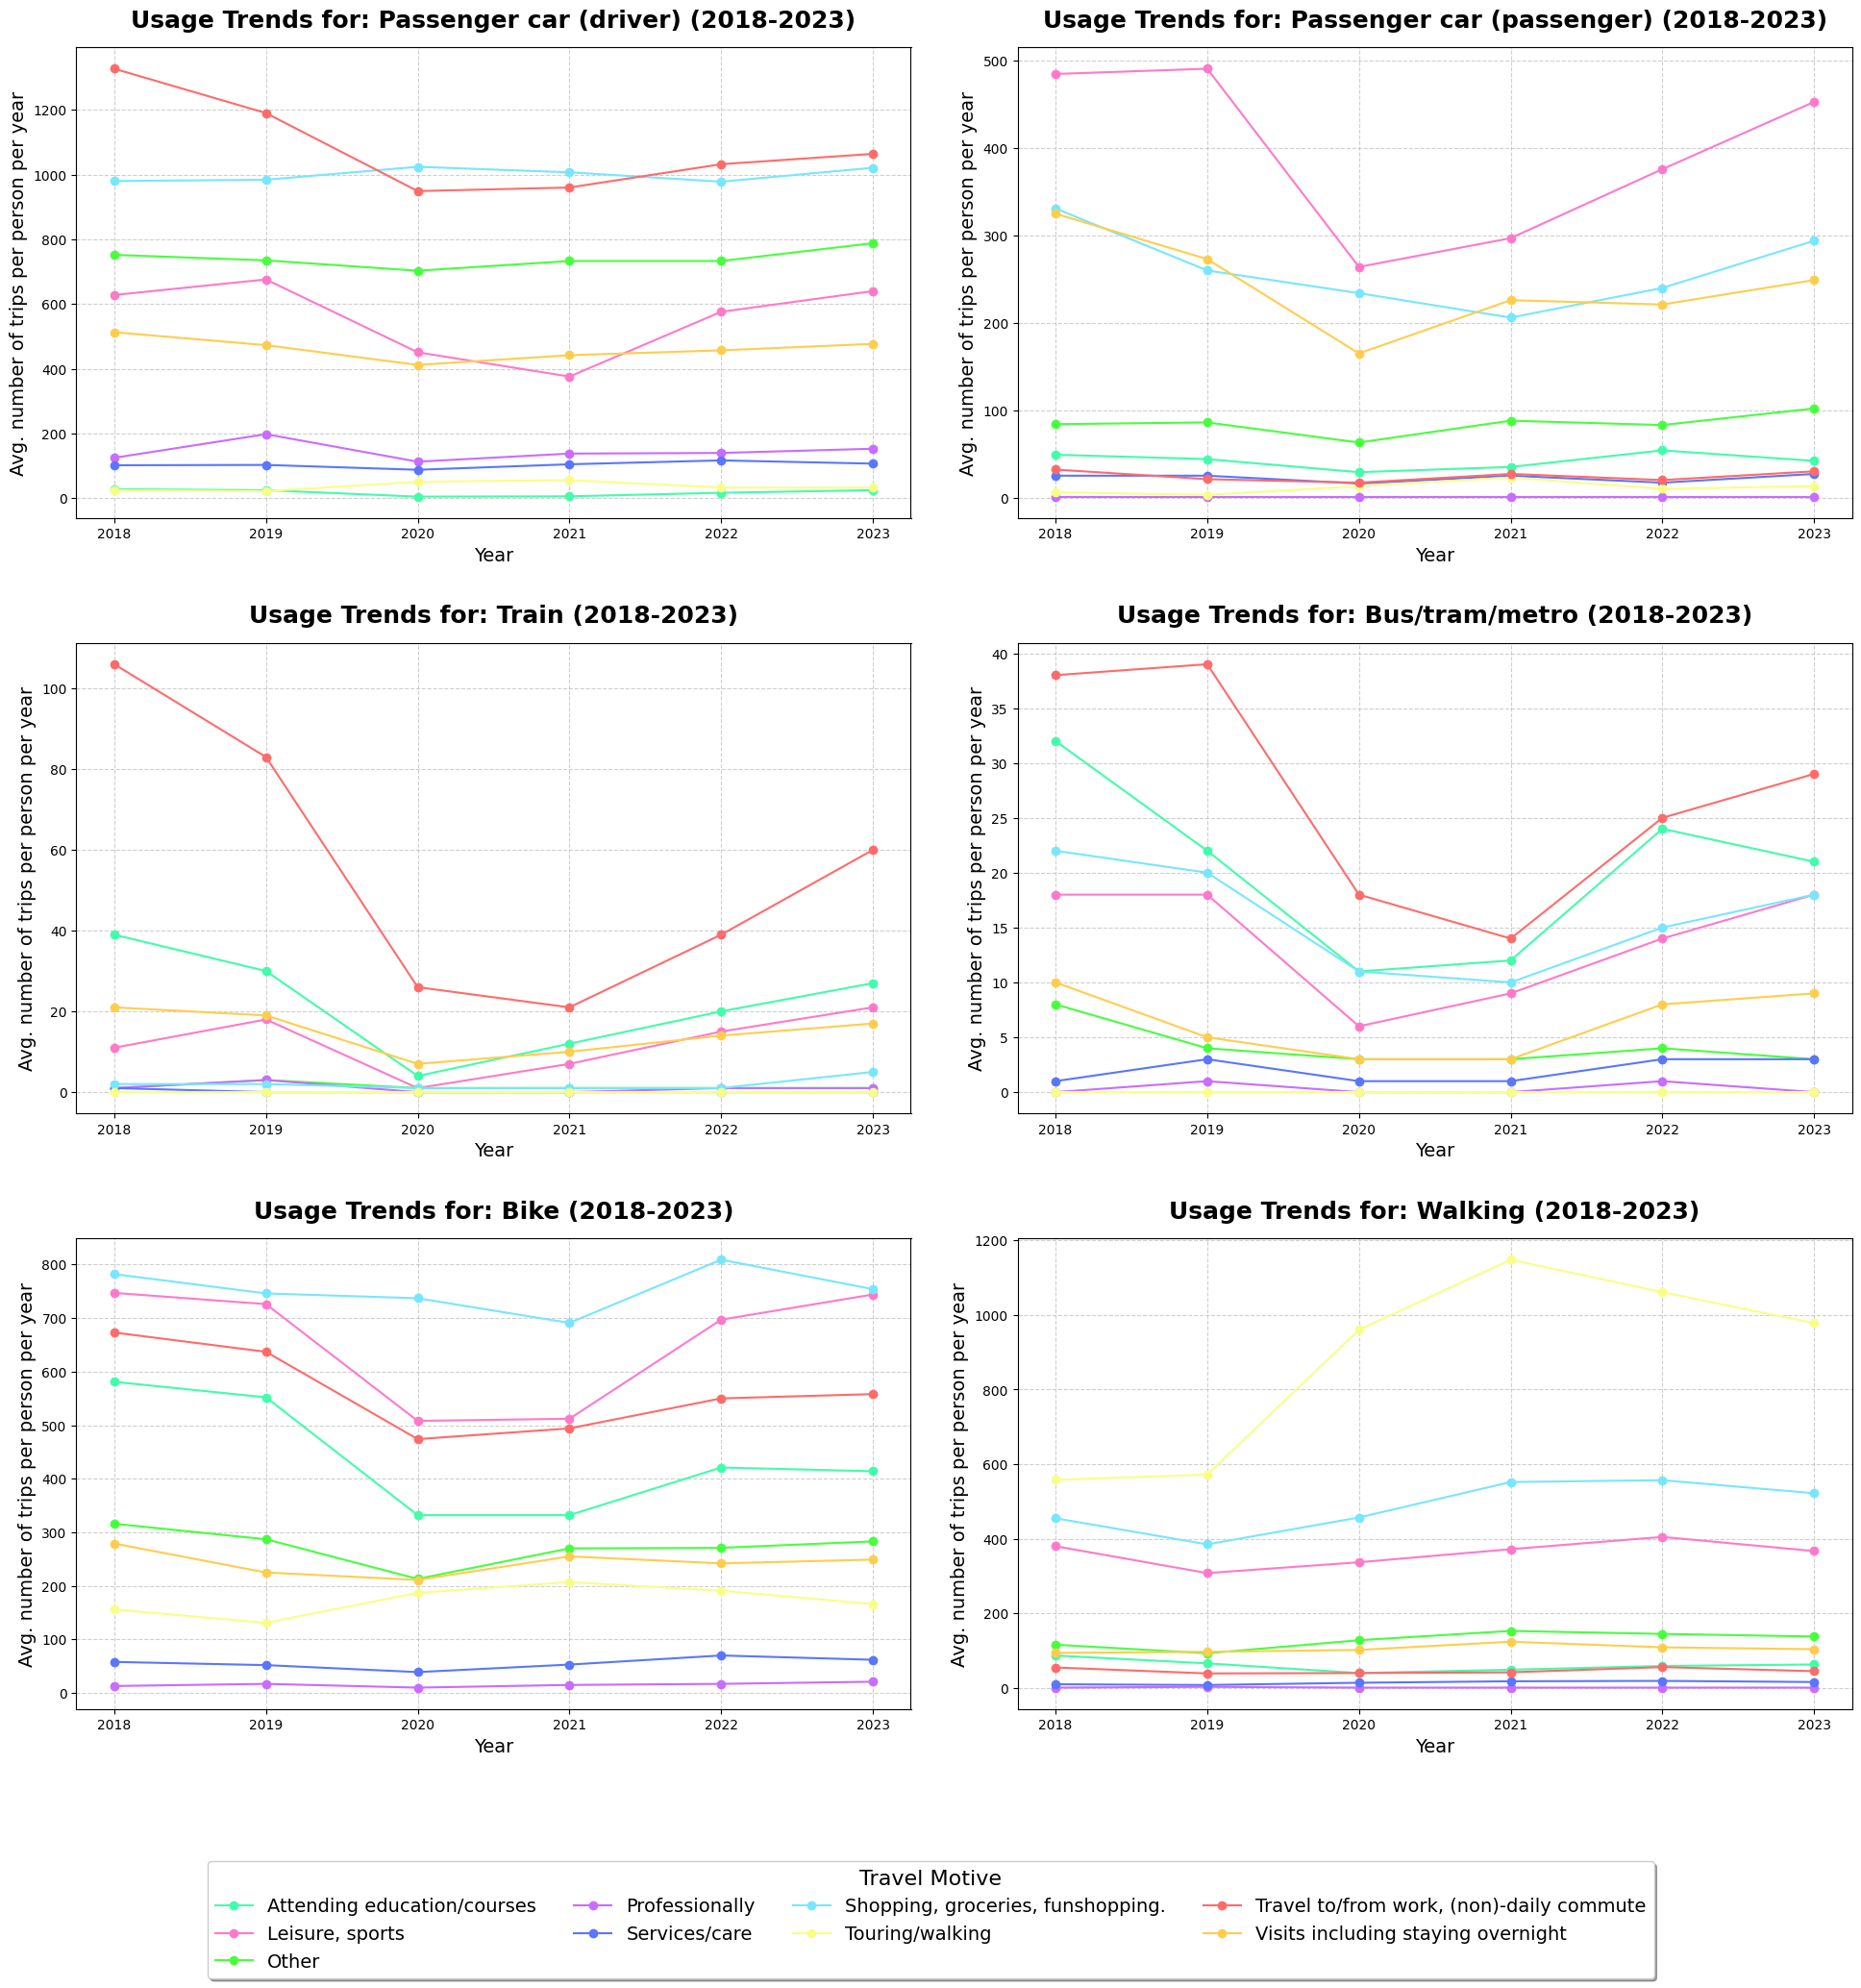

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os 

file_path = os.path.join("data", "clean_data.csv") 
df = pd.read_csv(file_path)
# --------------------------------------------------------

# Define the colors list (deze was nodig voor de NameError)
colors = ['#FF6B6B',"#C96CFF", "#5A76FF", "#77E6FF", "#42FDA9", "#FFCD4E", "#FF79CA", "#F7FF87", "#47FF3E"]

# ... De rest van de code, inclusief de verbeterde legende-verzameling, blijft identiek ...
# ... (deze code is nu robuust en werkt met elke geldige dataset) ...


# ... (filtering en setup code)
selected_modes = [
    'Passenger car (driver)', 
    'Passenger car (passenger)', 
    'Train', 
    'Bus/tram/metro', 
    'Bike', 
    'Walking'
]

# Define the years to include
start_year = 2018
end_year = 2023

# Filter data for the relevant years and non-Total motives
all_data = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
all_data = all_data[all_data['Travel motives'] != 'Total']
all_data = all_data[all_data['Travel modes'].isin(selected_modes)]

# Get all unique travel motives (excluding 'Total')
available_motives = all_data['Travel motives'].unique()

# Define the layout for the 6 charts (3 rows, 2 columns)
n_cols = 2
n_rows = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20)) 

# Define colors for the different motives (to be consistent across all charts)
motive_colors = {
    motive: colors[i % len(colors)] for i, motive in enumerate(available_motives)
}

# --- Plotting Loop ---

# Nieuwe variabelen om handles en labels op te slaan
temp_handles = []
temp_labels = []

for i, mode in enumerate(selected_modes):
    ax = axes[i // n_cols, i % n_cols]
    mode_data = all_data[all_data['Travel modes'] == mode]
    mode_trends = mode_data.groupby(['Year', 'Travel motives'])['Average number of trips per person per year'].sum().unstack()
    
    if not mode_trends.empty:
        # Plot elke motive als een lijn
        for motive in mode_trends.columns:
            line, = ax.plot(mode_trends.index, 
                    mode_trends[motive], 
                    label=motive, 
                    marker='o', 
                    linestyle='-',
                    color=motive_colors.get(motive, '#000000'))
            
            # Sla de handles en labels op, maar alleen als ze nog niet zijn opgeslagen
            if motive not in temp_labels:
                temp_handles.append(line)
                temp_labels.append(motive)
        
        # Set titles and labels
        ax.set_title(f'Usage Trends for: {mode} ({start_year}-{end_year})', fontsize=18, fontweight='bold', pad=15)
        ax.set_xlabel('Year', fontsize=14)
        ax.set_ylabel('Avg. number of trips per person per year', fontsize=14)
        ax.set_xticks(range(start_year, end_year + 1))
        ax.grid(True, linestyle='--', alpha=0.6)
        
# --- Centrale Legende en Finale Aanpassingen ---
handles, labels = [], []
for ax in axes.flatten():
    current_handles, current_labels = ax.get_legend_handles_labels()
    
    # Voeg alleen de nieuwe handles en labels toe (ontdubbeling)
    for h, l in zip(current_handles, current_labels):
        if l not in labels:
            handles.append(h) # <-- HIER WORDT 'handles' GEDEFINIEERD
            labels.append(l)
# Bepaal het aantal kolommen voor de legende
vaste_n_cols = 4 

# Maak één centrale legende voor de hele figuur
fig.legend(handles, 
           labels, 
           title='Travel Motive', 
           # --- AANPASSINGEN HIER ---
           loc='lower center', # Plaatsing onderin
           bbox_to_anchor=(0.5, -0.05), # Verschuiving naar midden en net onder de figuurrand
           ncol=vaste_n_cols, 
           # --------------------------
           fontsize=14, 
           title_fontsize=16,
           fancybox=True, 
           shadow=True)

# Pas de lay-out aan om RUIMTE ONDERAAN te maken voor de legende
# rect=[links, onder, rechts, boven]. De 0.05 voor 'onder' zorgt voor ruimte.
plt.tight_layout(rect=[0, 0.05, 1, 1], pad=3.0) 
plt.show()